In [ ]:
# Step 1: Data Preparation

In [1]:
import pandas as pd

# Sample Buyer Data
buyers = pd.DataFrame({
    'BuyerID': [1, 2, 3, 4, 5],
    'Country': ['Japan', 'UAE', 'India', 'UAE', 'UAE'],
    'Industry': ['Agriculture', 'Textiles', 'Textiles', 'Textiles', 'Textiles'],
    'RequiredProduct': ['Product B', 'Product B', 'Product D', 'Product B', 'Product C'],
    'MaxBudgetUSD': [116690, 54499, 56295, 170885, 176071],
    'Urgency': ['High', 'Medium', 'High', 'Medium', 'Medium'],
    'ContactEmail': ['buyer1@example.com', 'buyer2@example.com', 'buyer3@example.com', 'buyer4@example.com', 'buyer5@example.com'],
    'PhoneNumber': ['+1-555-0001', '+1-555-0002', '+1-555-0003', '+1-555-0004', '+1-555-0005']
})

# Sample Seller Data
sellers = pd.DataFrame({
    'SellerID': [1, 2, 3, 4, 5],
    'Country': ['UAE', 'Japan', 'USA', 'UAE', 'UAE'],
    'Industry': ['Pharma', 'Textiles', 'Pharma', 'Electronics', 'Agriculture'],
    'OfferedProduct': ['Product B', 'Product B', 'Product C', 'Product C', 'Product B'],
    'PriceUSD': [201426, 53843, 154065, 111726, 57640],
    'Availability': ['Immediate', '3 Months', '1 Month', '1 Month', '3 Months'],
    'ContactEmail': ['seller1@example.com', 'seller2@example.com', 'seller3@example.com', 'seller4@example.com', 'seller5@example.com'],
    'PhoneNumber': ['+1-444-0001', '+1-444-0002', '+1-444-0003', '+1-444-0004', '+1-444-0005']
})


In [4]:
# Step 2: Find Matches
urgency_priority = {'High': 1, 'Medium': 2, 'Low': 3}  # Define urgency priority

matches = []

# Sort buyers by urgency
buyers_sorted = buyers.copy()
buyers_sorted['UrgencyPriority'] = buyers_sorted['Urgency'].map(urgency_priority)
buyers_sorted = buyers_sorted.sort_values(by='UrgencyPriority')

for _, buyer in buyers_sorted.iterrows():
    for _, seller in sellers.iterrows():
        # Matching logic including urgency
        if buyer['RequiredProduct'] == seller['OfferedProduct'] and buyer['MaxBudgetUSD'] >= seller['PriceUSD']:
            matches.append({
                'BuyerID': buyer['BuyerID'],
                'BuyerCountry': buyer['Country'],
                'RequiredProduct': buyer['RequiredProduct'],
                'MaxBudgetUSD': buyer['MaxBudgetUSD'],
                'Urgency': buyer['Urgency'],
                'BuyerContactEmail': buyer['ContactEmail'],
                'SellerID': seller['SellerID'],
                'SellerCountry': seller['Country'],
                'PriceUSD': seller['PriceUSD'],
                'Availability': seller['Availability'],
                'SellerContactEmail': seller['ContactEmail'],
                'SellerPhoneNumber': seller['PhoneNumber']
            })

matches_df = pd.DataFrame(matches)

# Display matches
print(matches_df)



   BuyerID BuyerCountry RequiredProduct  MaxBudgetUSD Urgency  \
0        1        Japan       Product B        116690    High   
1        1        Japan       Product B        116690    High   
2        2          UAE       Product B         54499  Medium   
3        4          UAE       Product B        170885  Medium   
4        4          UAE       Product B        170885  Medium   
5        5          UAE       Product C        176071  Medium   
6        5          UAE       Product C        176071  Medium   

    BuyerContactEmail  SellerID SellerCountry  PriceUSD Availability  \
0  buyer1@example.com         2         Japan     53843     3 Months   
1  buyer1@example.com         5           UAE     57640     3 Months   
2  buyer2@example.com         2         Japan     53843     3 Months   
3  buyer4@example.com         2         Japan     53843     3 Months   
4  buyer4@example.com         5           UAE     57640     3 Months   
5  buyer5@example.com         3           USA  

In [5]:
# Step 3: Basic Validation (Model Building)
# This is just a simple check, but we can extend it with machine learning techniques later.

accuracy = len(matches_df) / len(buyers)  # Basic match ratio as an accuracy measure

print(f'Model Accuracy: {accuracy}')
print(matches_df)


Model Accuracy: 1.4
   BuyerID BuyerCountry RequiredProduct  MaxBudgetUSD Urgency  \
0        1        Japan       Product B        116690    High   
1        1        Japan       Product B        116690    High   
2        2          UAE       Product B         54499  Medium   
3        4          UAE       Product B        170885  Medium   
4        4          UAE       Product B        170885  Medium   
5        5          UAE       Product C        176071  Medium   
6        5          UAE       Product C        176071  Medium   

    BuyerContactEmail  SellerID SellerCountry  PriceUSD Availability  \
0  buyer1@example.com         2         Japan     53843     3 Months   
1  buyer1@example.com         5           UAE     57640     3 Months   
2  buyer2@example.com         2         Japan     53843     3 Months   
3  buyer4@example.com         2         Japan     53843     3 Months   
4  buyer4@example.com         5           UAE     57640     3 Months   
5  buyer5@example.com      

In [ ]:
# As you can see our model accuracy is unsually high.
#its because we created synthetic data because buyer seller data is not available free on internet.

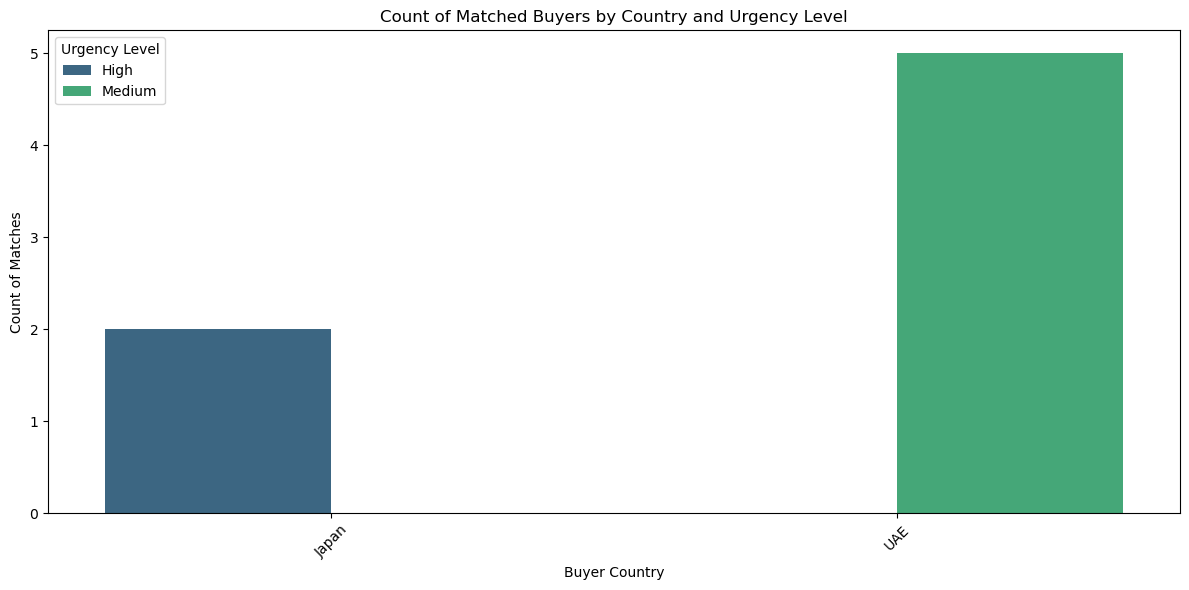

In [8]:
# Create a bar plot for the count of matched buyers by country and urgency
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(data=matches_df, x='BuyerCountry', hue='Urgency', palette='viridis')
plt.title('Count of Matched Buyers by Country and Urgency Level')
plt.xlabel('Buyer Country')
plt.ylabel('Count of Matches')
plt.legend(title='Urgency Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

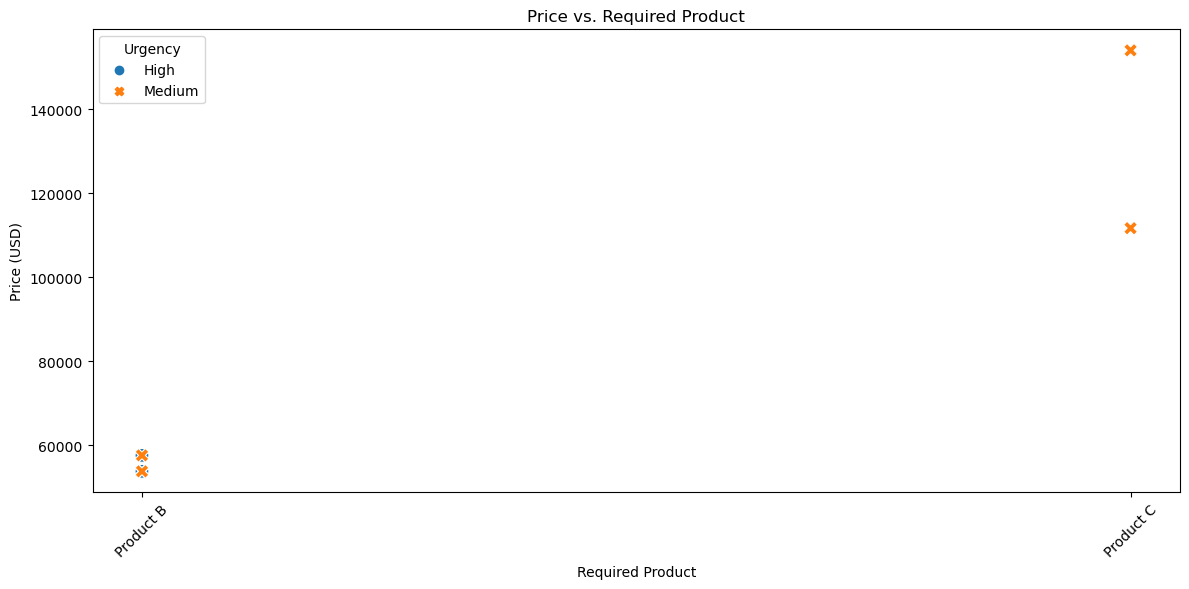

In [9]:
# Create a scatter plot to show Price vs. Required Product
plt.figure(figsize=(12, 6))
sns.scatterplot(data=matches_df, x='RequiredProduct', y='PriceUSD', hue='Urgency', style='Urgency', s=100)
plt.title('Price vs. Required Product')
plt.xlabel('Required Product')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()